# Data Analysis and Data Science
## Putting it all together 

By: Caroline Labelle
<br>For: BIM6065-C

<br>
Date: July 8th, 2024

<hr style="border:1px solid black"> </hr>

In [49]:
### Student Name: Emmanuelle Del Guidice

Complete the following exercises and push your notebook on Github: submit your Github handle on StudiUM.

In a terminal : 

1. Go in the same directory as your notebook: `cd path_to_your_notebook/`
2. Commit the change made to your notebook: `git commit -am "add_your_personalized_note"`
3. Push your commit on Github: `git push origin main`

Go to Github and double check that the pushed Notebook is the version you want to hand in.

In [50]:
### Import sklearn
import sklearn.decomposition, sklearn.cluster

### Import scipy
import scipy as sp

### Import pandas, numpy, seaborn and matplotlib.pyplot
import pandas as pd
import numpy as np
import seaborn as sns

In [51]:
sns.set(rc={'figure.figsize':(4, 2)})
sns.set_theme(context="notebook", style="white")

# Breast Cancer Subtypes Analysis [50 pts]

You are given a gene expression dataset of $N$ breast cancer patients with their clinical subtype. You wish to know if you can assess the clinical subtypes based on the gene expression. To do so you will be using various methods presented through out the class.

## Import the data [10 pts]

Your dataset concist of three files: 
1. `genes_id.txt`
2. `patient_subtype.txt`
3. `patient_expression.txt`. 

Import the various files and build your dataset daframe. You should have for each patient her/his gene expression profil and clinical subtypes. Use the gene IDs as identifier for the columns or row names (you choose how to build your dataframe).

### Import the files individually [3 pts]

In [52]:
## Import genes_id.txt
gen = pd.read_csv("~/data_analysis/code_github/datasets/genes_id.txt", header=None, names=['gene_ID'])
gen.head()


,gene_ID
0,ENSG00000011426.9
1,ENSG00000054598.6
2,ENSG00000062038.12
3,ENSG00000077152.8
4,ENSG00000082175.13


In [53]:
## Import patient_subtype.txt
pat_sub = pd.read_csv("~/data_analysis/code_github/datasets/patient_subtype.txt", header=None, names=['subtype'])
pat_sub.head()

,subtype
0,Basal
1,Basal
2,Basal
3,Basal
4,Basal


In [54]:
## Import patient_expression.txt
pat_ex = pd.read_csv("~/data_analysis/code_github/datasets/patient_expression.txt", header=None, sep=" ")
pat_ex.head()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,3.996567,...,0.415417,3.163366,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.860720
1,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,1.344271,...,2.035764,2.339897,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.075090
2,3.246316,4.423018,3.700385,4.369893,0.155187,3.752491,0.102125,3.779098,2.218593,1.927426,...,1.123048,3.647681,1.063245,2.876544,4.498677,2.722251,3.125330,1.928449,0.374845,2.531836
3,2.161512,2.314358,3.562899,3.786747,0.039245,4.227823,0.493791,4.124650,2.202475,2.317170,...,0.930984,3.071066,0.577870,2.554480,4.879861,3.597988,5.953152,3.761062,0.528845,1.604472
4,2.795468,1.876752,0.658127,2.581386,0.014486,2.688765,0.432283,2.655957,1.872897,0.924654,...,1.975961,2.893713,0.272402,2.119050,3.571224,2.554718,0.189085,0.000000,0.199501,0.041927


### How many patient are you considering? [1 pt]

In [55]:
print(len(pat_sub), "patients")

645 patients


### How many genes are you considering? [1 pt]

In [56]:
print(len(gen), "genes")

47 genes


### Combine the data from all three files into one dataframe [5 pts]
You can use one of the dataframe as the 'main' one, and then rename its columns and add a new column.

**Show a preview/overview of your dataframe**

In [57]:
## Adapt pat_ex dataframe: first column is the patient ID, the first row is the gene ID and add a column for patient subtype

data = pat_ex.copy()
data.columns = gen['gene_ID']

data.loc[:, "Clinical subtypes"] = pat_sub.iloc[:, 0]
data.head()


gene_ID,ENSG00000011426.9,ENSG00000054598.6,ENSG00000062038.12,ENSG00000077152.8,ENSG00000082175.13,ENSG00000089685.13,ENSG00000091831.20,ENSG00000092621.10,ENSG00000094804.8,ENSG00000099953.8,...,ENSG00000171848.12,ENSG00000173890.15,ENSG00000174371.15,ENSG00000175063.15,ENSG00000176890.14,ENSG00000186081.10,ENSG00000186847.5,ENSG00000186868.14,ENSG00000261857.5,Clinical subtypes
0,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,3.996567,...,3.163366,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.860720,Basal
1,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,1.344271,...,2.339897,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.075090,Basal
2,3.246316,4.423018,3.700385,4.369893,0.155187,3.752491,0.102125,3.779098,2.218593,1.927426,...,3.647681,1.063245,2.876544,4.498677,2.722251,3.125330,1.928449,0.374845,2.531836,Basal
3,2.161512,2.314358,3.562899,3.786747,0.039245,4.227823,0.493791,4.124650,2.202475,2.317170,...,3.071066,0.577870,2.554480,4.879861,3.597988,5.953152,3.761062,0.528845,1.604472,Basal
4,2.795468,1.876752,0.658127,2.581386,0.014486,2.688765,0.432283,2.655957,1.872897,0.924654,...,2.893713,0.272402,2.119050,3.571224,2.554718,0.189085,0.000000,0.199501,0.041927,Basal


## Explore the dataset [15 pts]

### How many subtypes are you considering? [1 pts]

In [58]:
print("Nb. of subtypes:", data.loc[:, 'Clinical subtypes'].nunique())

Nb. of subtypes: 5


### How many patients are associtated to each subtype? [2 pts]

In [59]:
data.value_counts(['Clinical subtypes'])

Clinical subtypes
Basal                191
LumA                 179
LumB                 165
Her2                  82
Normal                28
Name: count, dtype: int64

### Generate a graph showing the distribution of the average expression of each gene [5 pts]

In [60]:
## First we need to calculate the average expression of each gene

mean_ex = data.iloc[:, 0:47].mean()
mean_ex.head()

gene_ID
ENSG00000011426.9     2.164062
ENSG00000054598.6     1.535686
ENSG00000062038.12    2.102870
ENSG00000077152.8     3.132112
ENSG00000082175.13    1.179845
dtype: float64

Text(0.5, 1.0, 'Average gene expression distribution of each gene')

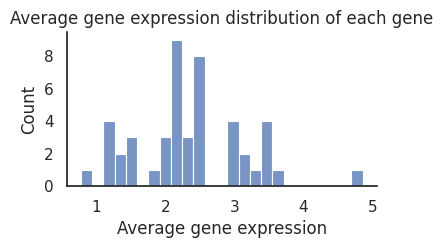

In [61]:
import matplotlib.pyplot as plt

graph = sns.histplot(mean_ex, bins=25)
sns.despine()


## Add labels
graph.set_xlabel('Average gene expression')
graph.set_title('Average gene expression distribution of each gene')

### What are the two genes with the largest standard deviation for all patient? [2 pts]
To answer this question, you can use the `df.std()` and `df.sort_values()`. You can look into the doc for more informations on these two functions.
1. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html
2. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values

In [62]:
gen_std = data.iloc[:, 0:47].std()
gen_std.head()


gene_ID
ENSG00000011426.9     0.781086
ENSG00000054598.6     1.254415
ENSG00000062038.12    1.246204
ENSG00000077152.8     0.744226
ENSG00000082175.13    1.332091
dtype: float64

In [63]:
gen_std_sorted = gen_std.sort_values(ascending=False)
top2 = gen_std_sorted.head(2)
print("The two genes with the largest standard deviation for all patients are:", top2)

The two genes with the largest standard deviation for all patients are: gene_ID
ENSG00000186081.10    1.899352
ENSG00000128422.14    1.880477
dtype: float64


### Compare the expression of these two genes: are they corrolated based on tumor subtypes? [5 pts]
The two genes to consider are **ENSG00000186081.10** and **ENSG00000128422.14**.

To answer this question: 
1. Make a figure showing the correlation between the two genes by clinical subtypes,
2. Calculate a correlation coefficient for each comparison and,
3. Briefly interpret your results (make sure your interpretation is consistent with the correlation coefficient used).

In [64]:
basal = data.loc[(data['Clinical subtypes'] == 'Basal'), ['ENSG00000186081.10', 'ENSG00000128422.14']]
normal = data.loc[(data['Clinical subtypes'] == 'Normal'), ['ENSG00000186081.10', 'ENSG00000128422.14']]
lumA = data.loc[(data['Clinical subtypes'] == 'LumA'), ['ENSG00000186081.10', 'ENSG00000128422.14']]
lumB = data.loc[(data['Clinical subtypes'] == 'LumB'), ['ENSG00000186081.10', 'ENSG00000128422.14']]
her2 = data.loc[(data['Clinical subtypes'] == 'Her2'), ['ENSG00000186081.10', 'ENSG00000128422.14']]

Pearson coefficients:

Global: 0.852
Basal: 0.554
Normal: 0.535
LumA: 0.891
LumB: 0.897
Her2: 0.736


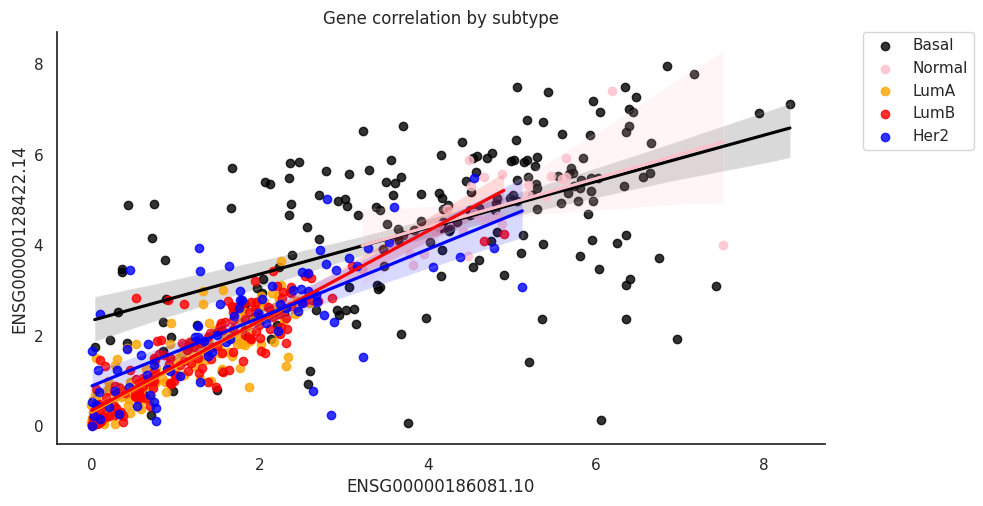

In [65]:
# Create a figure and axis
p = plt.figure(figsize=(10, 5))

# Plot the first regression line
p = sns.regplot(x=basal['ENSG00000186081.10'], y=basal['ENSG00000128422.14'], label='Basal', color='black')

# Plot the second regression line
p = sns.regplot(x=normal['ENSG00000186081.10'], y=normal['ENSG00000128422.14'], label='Normal', color='pink')

# Plot the third regression line
p = sns.regplot(x=lumA['ENSG00000186081.10'], y=lumA['ENSG00000128422.14'], label='LumA', color='orange')

# Plot the fourth regression line
p = sns.regplot(x=lumB['ENSG00000186081.10'], y=lumB['ENSG00000128422.14'], label='LumB', color='red')

# Plot the fifth regression line
p = sns.regplot(x=her2['ENSG00000186081.10'], y=her2['ENSG00000128422.14'], label='Her2', color='blue')

# Add a legend
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
legend
legend = plt.tight_layout()


# Add labels and title
plt.xlabel('ENSG00000186081.10')
plt.ylabel('ENSG00000128422.14')
plt.title('Gene correlation by subtype')

# Despine
sns.despine()

# Pearson coefficients
print("Pearson coefficients:\n")

reg = sp.stats.linregress(x=data['ENSG00000186081.10'], y=data['ENSG00000128422.14'], alternative='two-sided')
print("Global:", round(reg.rvalue, 3))

reg = sp.stats.linregress(x=basal['ENSG00000186081.10'], y=basal['ENSG00000128422.14'], alternative='two-sided')
print("Basal:", round(reg.rvalue, 3))

reg = sp.stats.linregress(x=normal['ENSG00000186081.10'], y=normal['ENSG00000128422.14'], alternative='two-sided')
print("Normal:", round(reg.rvalue, 3))

reg = sp.stats.linregress(x=lumA['ENSG00000186081.10'], y=lumA['ENSG00000128422.14'], alternative='two-sided')
print("LumA:", round(reg.rvalue, 3))

reg = sp.stats.linregress(x=lumB['ENSG00000186081.10'], y=lumB['ENSG00000128422.14'], alternative='two-sided')
print("LumB:", round(reg.rvalue, 3))

reg = sp.stats.linregress(x=her2['ENSG00000186081.10'], y=her2['ENSG00000128422.14'], alternative='two-sided')
print("Her2:", round(reg.rvalue, 3))


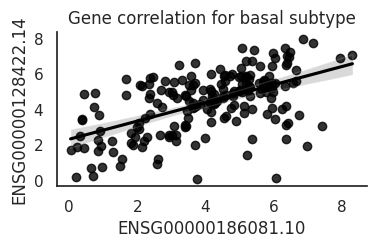

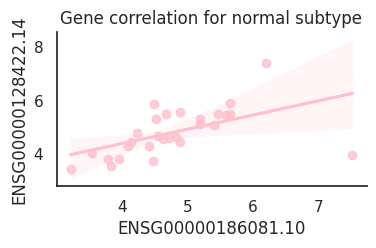

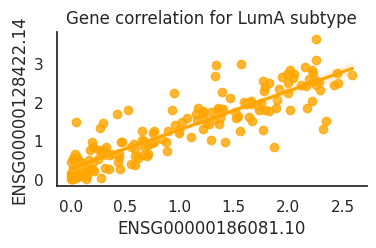

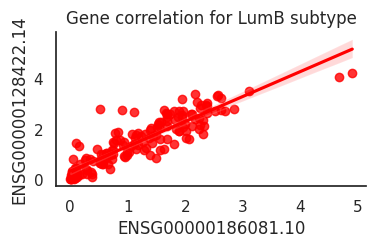

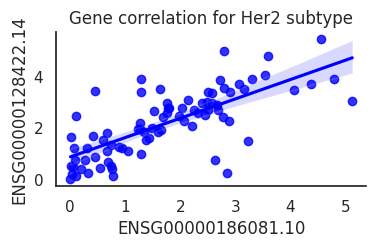

In [66]:
#### Alternative figures (separate)

# Plot the first figure
p = sns.regplot(x=basal['ENSG00000186081.10'], y=basal['ENSG00000128422.14'], label='Basal', color='black')
p.set_title('Gene correlation for basal subtype')
sns.despine()
plt.show()

# Plot the second figure
p = sns.regplot(x=normal['ENSG00000186081.10'], y=normal['ENSG00000128422.14'], label='Normal', color='pink')
p.set_title('Gene correlation for normal subtype')
sns.despine()
plt.show()

# Plot the third figure
p = sns.regplot(x=lumA['ENSG00000186081.10'], y=lumA['ENSG00000128422.14'], label='LumA', color='orange')
p.set_title('Gene correlation for LumA subtype')
sns.despine()
plt.show()

# Plot the fourth figure
p = sns.regplot(x=lumB['ENSG00000186081.10'], y=lumB['ENSG00000128422.14'], label='LumB', color='red')
p.set_title('Gene correlation for LumB subtype')
sns.despine()
plt.show()

# Plot the fifth figure
p = sns.regplot(x=her2['ENSG00000186081.10'], y=her2['ENSG00000128422.14'], label='Her2', color='blue')
p.set_title('Gene correlation for Her2 subtype')
sns.despine()
plt.show()


In [67]:
# Interpretation

print("There seems to be a positive linear correlation between the expression of the two genes (ENSG00000186081.10 and ENSG00000128422.14) in all clinical subtypes.")
print("The correlation is strongest for the luminal subtypes. They also seem to have the most tightly distributed gene expression profile and the lowest average expression.")

There seems to be a positive linear correlation between the expression of the two genes (ENSG00000186081.10 and ENSG00000128422.14) in all clinical subtypes.
The correlation is strongest for the luminal subtypes. They also seem to have the most tightly distributed gene expression profile and the lowest average expression.


## Clustering [25 pts]
You are wondering if the M genes considered by your dataset are enough to cluster the N patients by their cancer subtype. To answer this question, you first want to apply a dimensionality reduction algorithm to your dataset. You then want to apply a clustering alogirthme to the reduced components, and compare the clustering labels to the clinical subtype of each patient.

### Apply a PCA Dimensionality reduction to your gene expression dataset [4 pts]

Once you selected the numerical gene expression, scale the value and initiate a PCA object. You want to reduce your set of features to **25 components**.

In [68]:
# Select numerical gene expression values

subset_PCA = data.iloc[:, 0:47]
subset_PCA.head()

gene_ID,ENSG00000011426.9,ENSG00000054598.6,ENSG00000062038.12,ENSG00000077152.8,ENSG00000082175.13,ENSG00000089685.13,ENSG00000091831.20,ENSG00000092621.10,ENSG00000094804.8,ENSG00000099953.8,...,ENSG00000171791.11,ENSG00000171848.12,ENSG00000173890.15,ENSG00000174371.15,ENSG00000175063.15,ENSG00000176890.14,ENSG00000186081.10,ENSG00000186847.5,ENSG00000186868.14,ENSG00000261857.5
0,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,3.996567,...,0.415417,3.163366,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.860720
1,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,1.344271,...,2.035764,2.339897,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.075090
2,3.246316,4.423018,3.700385,4.369893,0.155187,3.752491,0.102125,3.779098,2.218593,1.927426,...,1.123048,3.647681,1.063245,2.876544,4.498677,2.722251,3.125330,1.928449,0.374845,2.531836
3,2.161512,2.314358,3.562899,3.786747,0.039245,4.227823,0.493791,4.124650,2.202475,2.317170,...,0.930984,3.071066,0.577870,2.554480,4.879861,3.597988,5.953152,3.761062,0.528845,1.604472
4,2.795468,1.876752,0.658127,2.581386,0.014486,2.688765,0.432283,2.655957,1.872897,0.924654,...,1.975961,2.893713,0.272402,2.119050,3.571224,2.554718,0.189085,0.000000,0.199501,0.041927


In [69]:
# Instantiate a new scaler: we want the data to be on the same scale
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(subset_PCA)

# Apply the pattern
subset_scaled = scaler.transform(subset_PCA) 

In [70]:
### Initiate the PCA and apply it to the scaled data
pca = sklearn.decomposition.PCA(n_components=25)
pca.fit(subset_scaled)

PCA(n_components=25)

### What percentage of the variance of the dataset is explained by the two first component? [2 pt]

In [71]:
print(round(sum(pca.explained_variance_ratio_[0:2]*100), 1), "% of the variance of the dataset is explained by the two first components.")


57.5 % of the variance of the dataset is explained by the two first components.


### Apply the PCA onto your gene expression data and create a DataFrame with the PCs and the clinical patient subtypes [4 pts]
**Show a preview/overview of your dataframe**

In [72]:
### Apply the dimensionality reduction to our data
pca_reduce = pca.fit_transform(subset_scaled)

### Make a dataframe and add the label column
data_reduce = pd.DataFrame(pca_reduce)

data_reduce.loc[:, "Clinical subtypes"] = data['Clinical subtypes']
data_reduce.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,Clinical subtypes
0,5.445487,2.428348,0.994181,3.234351,0.581775,0.503669,-1.314576,1.770997,-1.192583,-0.811812,...,-1.875858,0.426612,0.114464,-0.851402,1.109125,0.041479,0.916238,0.283359,1.411175,Basal
1,5.413304,2.726559,-0.916842,0.937050,-1.994252,0.303562,-0.123579,-0.860660,-0.201094,0.128108,...,0.501419,-0.084159,0.432827,0.036273,-0.020044,-0.211830,-0.521534,0.355593,-0.205031,Basal
2,8.407711,0.419360,-2.059230,-0.792823,-1.954798,-0.389237,0.139329,0.366723,-0.093978,0.865002,...,-0.397783,0.131195,-0.107449,0.023024,-0.212187,0.308241,-0.325319,0.193784,0.278587,Basal
3,7.328172,0.176822,-0.737810,2.308405,-1.091921,-0.587628,-0.933543,0.759118,-0.101877,-0.162309,...,-0.469685,-0.240287,0.302134,-0.237978,0.268315,-0.380987,-0.429954,0.023508,0.039688,Basal
4,3.819484,2.102397,-2.357337,-6.491174,-0.157028,-1.487336,-1.577103,1.635241,-0.133013,-0.757461,...,-0.835880,0.055895,-2.013600,0.320591,1.559804,0.849584,-0.104835,0.746528,0.459466,Basal


### Plot a figure showing the two first PCs and color the samples by their clinical subtype [3 pts]
Do you think the k-means algorithm will be able to accurately cluster patients based on their clinical subtype? Why?

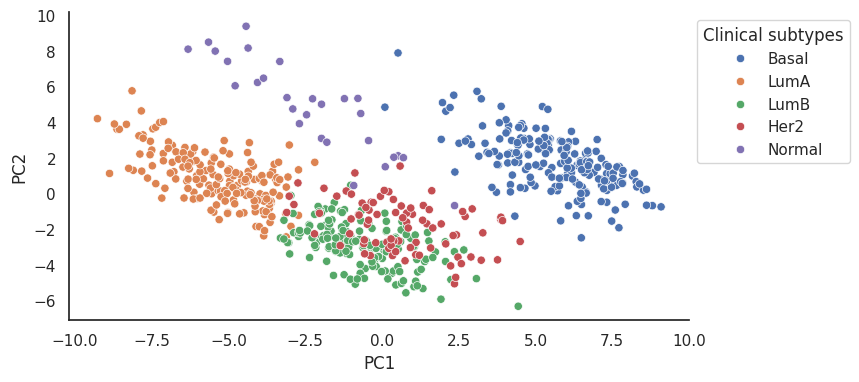

In [73]:
### Plot the two first components

p = plt.figure(figsize=(8, 4))
p = sns.scatterplot(data_reduce, x=0, y=1, hue='Clinical subtypes')

p.set_xlabel('PC1')
p.set_ylabel('PC2')

sns.move_legend(p, "upper left", bbox_to_anchor=(1,1))
sns.despine()

In [74]:
### Interpretation
print("I think that the k-means algorithm will be able to cluster most of the patients by subtype, except possibly for LumB and Her2 subtypes that seem to have a lot of overlap in their gene expression profile in the first two components of the PCA.")

I think that the k-means algorithm will be able to cluster most of the patients by subtype, except possibly for LumB and Her2 subtypes that seem to have a lot of overlap in their gene expression profile in the first two components of the PCA.


### Apply the K-means algorithme to your reduced dataset [5 pts]
When applying the K-means, you should use all 25 PCs, generated by your PCA. Add the k-means labels to your reduced dataset.

In [75]:
### Initiate the k-means algorithm
### How many cluster should we use?
kmean_algo = sklearn.cluster.KMeans(n_clusters=5, n_init="auto")

In [76]:
### Apply kmeans to our data
subset_KM = data_reduce.iloc[:, 0:25]
kmeans_subset = kmean_algo.fit(subset_KM)
kmeans_subset

KMeans(n_clusters=5)

### What value of k did you use and why? [2 pt]

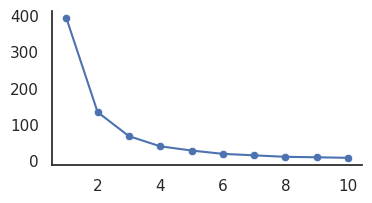

In [77]:
inertia_list = []

X = data.iloc[:, 0:1]

### Create for loop for K from 1 to 10
for k in range(1, 11) :
    kmean = sklearn.cluster.KMeans(n_clusters=k, n_init="auto")
    kmeans_X = kmean.fit(X)
    
    ## Add the inertia to the list
    inertia_list += [kmeans_X.inertia_]
    
### Plot K vs. intertia
sns.lineplot(x=np.arange(1, 11), y=inertia_list)
sns.scatterplot(x=np.arange(1, 11), y=inertia_list)
sns.despine()

In [78]:
print("I used 5 as a k-values because I have 5 clinical subtypes and I want to determine if gene expression clusters by clinical subtypes.")
print("This value makes sense considering kmean inertia. ")

I used 5 as a k-values because I have 5 clinical subtypes and I want to determine if gene expression clusters by clinical subtypes.
This value makes sense considering kmean inertia. 


### Compare your k-means labels to the clinical substypes [5 pts]
You comparison can by qualitative and/or quantitative.

**Are you able to cluster patient by clinical substypes from your subset of gene expressions? Briefly describe and interpret your results.**

In [79]:
### Get centroids coordinate
cent_by_axes = kmeans_subset.cluster_centers_.T

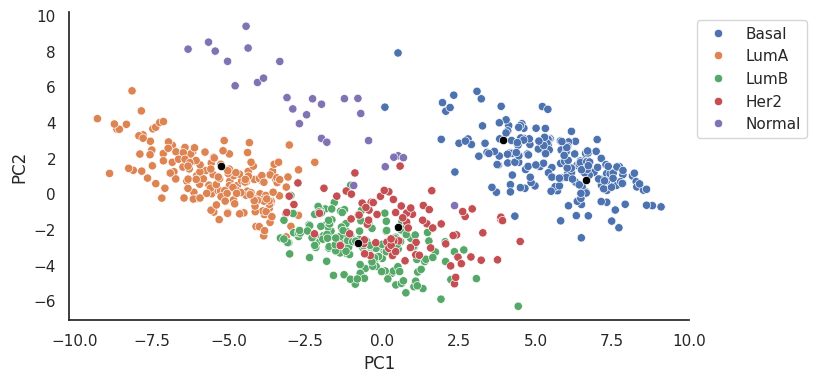

In [80]:
### Plot the two first components

p = plt.figure(figsize=(8, 4))
p = sns.scatterplot(data_reduce, x=0, y=1, hue='Clinical subtypes')

p.set_xlabel('PC1')
p.set_ylabel('PC2')

### Visualize the centroid on the plot
sns.scatterplot(x=cent_by_axes[0], y=cent_by_axes[1], color='black')

sns.move_legend(p, "upper left", bbox_to_anchor=(1,1))
sns.despine()

In [81]:
### Compare the kmean labels and the true grouping values (Clinical subtypes)
### Add two new coumns with the different grouping to our subset_KM
subset_KM.loc[:, "Clinical subtypes"] = data['Clinical subtypes']
subset_KM.loc[:, "kmeans_labels"] = kmeans_subset.labels_

subset_KM.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,Clinical subtypes,kmeans_labels
0,5.445487,2.428348,0.994181,3.234351,0.581775,0.503669,-1.314576,1.770997,-1.192583,-0.811812,...,0.426612,0.114464,-0.851402,1.109125,0.041479,0.916238,0.283359,1.411175,Basal,3
1,5.413304,2.726559,-0.916842,0.937050,-1.994252,0.303562,-0.123579,-0.860660,-0.201094,0.128108,...,-0.084159,0.432827,0.036273,-0.020044,-0.211830,-0.521534,0.355593,-0.205031,Basal,3
2,8.407711,0.419360,-2.059230,-0.792823,-1.954798,-0.389237,0.139329,0.366723,-0.093978,0.865002,...,0.131195,-0.107449,0.023024,-0.212187,0.308241,-0.325319,0.193784,0.278587,Basal,1
3,7.328172,0.176822,-0.737810,2.308405,-1.091921,-0.587628,-0.933543,0.759118,-0.101877,-0.162309,...,-0.240287,0.302134,-0.237978,0.268315,-0.380987,-0.429954,0.023508,0.039688,Basal,1
4,3.819484,2.102397,-2.357337,-6.491174,-0.157028,-1.487336,-1.577103,1.635241,-0.133013,-0.757461,...,0.055895,-2.013600,0.320591,1.559804,0.849584,-0.104835,0.746528,0.459466,Basal,1


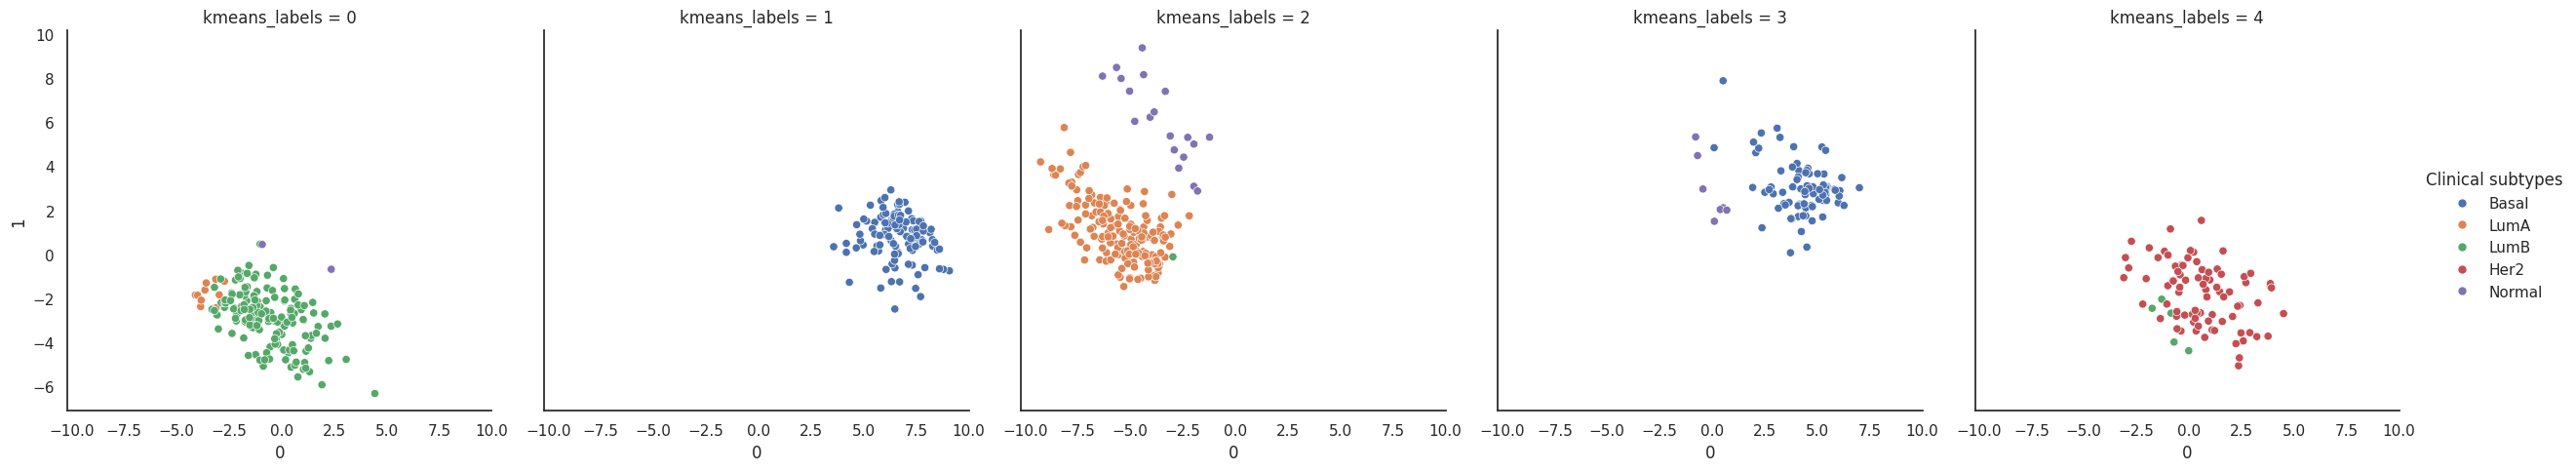

In [82]:
### Plot the comparison with the kmean labels and the true labels/groups
sns.relplot(subset_KM, x=subset_KM.iloc[:, 0], y=subset_KM.iloc[:, 1], hue="Clinical subtypes", col="kmeans_labels")
sns.move_legend(p, "upper left", bbox_to_anchor=(1,1))
sns.despine()

In [83]:
# Intepretation
print("Here, I performed a dimensionality reduction by PCA and I clustered by k-means with k=5 to see if the gene expression profile recapitulates the clinical subtype.")
print("I plotted the first two components of the PCA by k-mean cluster with a clinical subtype color code.")
print("The basal subtype is perfectly predicted by gene expression clustering and falls in the cluster #1.")
print("The normal subtype is not accurately predicted by gene expression clustering. Most of the datapoints are in cluster #0 but some are also present in cluster #2, 3 and 4")
print("The Luminal B subtype is mostly present in the cluster #2 but also in cluster #3 and 4.")
print("The Luminal A subtype is mostly present in the cluster #3 but also in cluster #0 and 1.")
print("Overall, considering that the first two components of the PCA explain 57.5 % of the gene expression variance, it makes sense that the clustering mostly corresponds to the clinical subtypes but not perfectly. It could also be that the clinical subtypes do not correspond exactly to gene expression profiles.")

Here, I performed a dimensionality reduction by PCA and I clustered by k-means with k=5 to see if the gene expression profile recapitulates the clinical subtype.
I plotted the first two components of the PCA by k-mean cluster with a clinical subtype color code.
The basal subtype is perfectly predicted by gene expression clustering and falls in the cluster #1.
The normal subtype is not accurately predicted by gene expression clustering. Most of the datapoints are in cluster #0 but some are also present in cluster #2, 3 and 4
The Luminal B subtype is mostly present in the cluster #2 but also in cluster #3 and 4.
The Luminal A subtype is mostly present in the cluster #3 but also in cluster #0 and 1.
Overall, considering that the first two components of the PCA explain 57.5 % of the gene expression variance, it makes sense that the clustering mostly corresponds to the clinical subtypes but not perfectly. It could also be that the clinical subtypes do not correspond exactly to gene expressi